# Importing necessary liabraries

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
#from keras.applications import resnet50
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix
import tensorflow as tf

# Data Preprocessing

In [2]:
train_path=r'C:\Users\sahoo\Desktop\Models\Village plant classification\PlantVillage\train'

labels=['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','background','Blueberry___healthy','Cherry_(including_sour)___healthy','Cherry_(including_sour)___Powdery_mildew','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight']
        
#MemoryError: Unable to allocate 21.5 GiB for an array with shape (44016, 256, 256) and data type float64


img_cube=[]

print("Importing image...")
for i in labels: #this will take the folder names as we call it as categoris
    path=os.path.join(train_path,i)
    label=labels.index(i)
    for j in os.listdir(path): #this will take the actual path of each folder image
        img_arr=cv2.imread(os.path.join(path,j)) #convert rgb image to gray scale image
        #gray_img=cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY )
        final_data=cv2.resize(img_arr,(150,150))
        img_cube.append([final_data,label])
    print(str(labels.index(i))+" done")
print("Complete!")

img_cube[10]

Importing image...
0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
Complete!


[array([[[139, 112, 121],
         [143, 116, 125],
         [146, 119, 128],
         ...,
         [189, 168, 176],
         [189, 168, 176],
         [188, 167, 175]],
 
        [[135, 108, 117],
         [135, 108, 117],
         [143, 116, 125],
         ...,
         [194, 173, 181],
         [186, 165, 173],
         [187, 166, 174]],
 
        [[143, 116, 125],
         [142, 115, 124],
         [146, 119, 128],
         ...,
         [201, 180, 188],
         [181, 160, 168],
         [193, 172, 180]],
 
        ...,
 
        [[124, 105, 122],
         [104,  85, 102],
         [125, 106, 123],
         ...,
         [177, 158, 173],
         [154, 136, 151],
         [150, 131, 146]],
 
        [[124, 105, 122],
         [115,  96, 113],
         [122, 103, 120],
         ...,
         [162, 143, 158],
         [162, 143, 158],
         [148, 128, 144]],
 
        [[117,  98, 115],
         [110,  91, 107],
         [116,  97, 114],
         ...,
         [163, 144, 159],
  

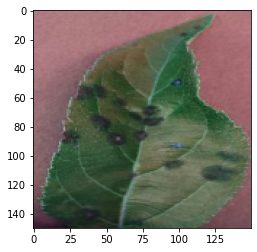

In [3]:
plt.imshow(img_cube[0][0])

In [4]:
len(img_cube),type(img_cube)

(8916, list)

In [5]:
img_cube[0][0]

array([[[176, 125, 132],
        [171, 120, 127],
        [174, 123, 130],
        ...,
        [175, 119, 124],
        [172, 116, 121],
        [173, 116, 122]],

       [[173, 122, 129],
        [178, 127, 134],
        [177, 126, 133],
        ...,
        [175, 119, 124],
        [172, 116, 121],
        [173, 118, 123]],

       [[175, 124, 131],
        [178, 127, 134],
        [173, 122, 129],
        ...,
        [174, 118, 123],
        [173, 117, 122],
        [175, 119, 124]],

       ...,

       [[ 62,  34,  50],
        [ 62,  34,  50],
        [ 62,  34,  50],
        ...,
        [115,  78,  86],
        [118,  80,  89],
        [119,  82,  90]],

       [[ 60,  34,  50],
        [ 59,  33,  49],
        [ 59,  33,  49],
        ...,
        [114,  77,  85],
        [116,  79,  87],
        [119,  81,  90]],

       [[ 52,  29,  44],
        [ 51,  28,  43],
        [ 50,  27,  42],
        ...,
        [112,  78,  85],
        [114,  80,  87],
        [115,  81,  88]]

In [6]:
img=[]
target=[]
for i,j in img_cube:
    img.append(i)
    target.append(j)
    
img=np.array(img)
target=np.array(target)

In [7]:
img=img/255.0  #normalizing pixel values

In [8]:
img[0]

array([[[0.69019608, 0.49019608, 0.51764706],
        [0.67058824, 0.47058824, 0.49803922],
        [0.68235294, 0.48235294, 0.50980392],
        ...,
        [0.68627451, 0.46666667, 0.48627451],
        [0.6745098 , 0.45490196, 0.4745098 ],
        [0.67843137, 0.45490196, 0.47843137]],

       [[0.67843137, 0.47843137, 0.50588235],
        [0.69803922, 0.49803922, 0.5254902 ],
        [0.69411765, 0.49411765, 0.52156863],
        ...,
        [0.68627451, 0.46666667, 0.48627451],
        [0.6745098 , 0.45490196, 0.4745098 ],
        [0.67843137, 0.4627451 , 0.48235294]],

       [[0.68627451, 0.48627451, 0.51372549],
        [0.69803922, 0.49803922, 0.5254902 ],
        [0.67843137, 0.47843137, 0.50588235],
        ...,
        [0.68235294, 0.4627451 , 0.48235294],
        [0.67843137, 0.45882353, 0.47843137],
        [0.68627451, 0.46666667, 0.48627451]],

       ...,

       [[0.24313725, 0.13333333, 0.19607843],
        [0.24313725, 0.13333333, 0.19607843],
        [0.24313725, 0

In [9]:
img.shape

(8916, 150, 150, 3)

In [10]:
target

array([ 0,  0,  0, ..., 11, 11, 11])

In [11]:
len(img),len(target)

(8916, 8916)

In [12]:
#but neural network handle image having three dimension data but here it is 2 so now we reshape pixel values
#img=img.reshape(len(img),256,256,1)

In [13]:
#prepare validation data

val_path=r'C:\Users\sahoo\Desktop\Models\Village plant classification\PlantVillage\val'

labels=['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy','background','Blueberry___healthy','Cherry_(including_sour)___healthy','Cherry_(including_sour)___Powdery_mildew','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight']
        #'Grape___Black_rot','Grape___Esca_(Black_Measles)','Grape___healthy','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Orange___Haunglongbing_(Citrus_greening)','Peach___Bacterial_spot','Peach___healthy','Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___healthy','Potato___Late_blight','Raspberry___healthy']
        #'Soybean___healthy','Squash___Powdery_mildew','Strawberry___healthy','Strawberry___Leaf_scorch','Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___healthy','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_mosaic_virus','Tomato___Tomato_Yellow_Leaf_Curl_Virus']

#MemoryError: Unable to allocate 21.5 GiB for an array with shape (44016, 256, 256) and data type float64


val_cube=[]

print("Importing image...")
for i in labels: #this will take the folder names as we call it as categoris
    path=os.path.join(val_path,i)
    label=labels.index(i)
    for j in os.listdir(path): #this will take the actual path of each folder image
        img_arr=cv2.imread(os.path.join(path,j)) #convert rgb image to gray scale image
        #gray_img=cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY )
        final_data=cv2.resize(img_arr,(150,150))
        val_cube.append([final_data,label])
    print(str(labels.index(i))+" done")
print("Complete!")

val_cube[10]

Importing image...
0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done
8 done
9 done
10 done
11 done
Complete!


[array([[[182, 160, 165],
         [180, 159, 163],
         [180, 158, 163],
         ...,
         [172, 153, 157],
         [174, 155, 158],
         [175, 156, 159]],
 
        [[180, 158, 163],
         [179, 157, 162],
         [179, 157, 162],
         ...,
         [176, 157, 160],
         [179, 160, 162],
         [178, 160, 162]],
 
        [[177, 155, 160],
         [178, 156, 161],
         [179, 157, 162],
         ...,
         [174, 155, 158],
         [175, 156, 159],
         [175, 156, 159]],
 
        ...,
 
        [[181, 156, 166],
         [181, 156, 166],
         [181, 156, 166],
         ...,
         [174, 151, 159],
         [175, 151, 160],
         [176, 153, 161]],
 
        [[182, 157, 167],
         [181, 156, 166],
         [181, 156, 166],
         ...,
         [174, 151, 159],
         [174, 151, 159],
         [175, 152, 160]],
 
        [[183, 158, 168],
         [183, 158, 168],
         [182, 156, 167],
         ...,
         [173, 150, 158],
  

In [14]:
print(len(val_cube),type(val_cube))
val_img=[]
val_target=[]
for i,j in val_cube:
    val_img.append(i)
    val_target.append(j)

val_img=np.array(val_img)
val_target=np.array(val_target)


2230 <class 'list'>


In [15]:
val_img=val_img/255.0  #normalizing pixel values

In [16]:
print(val_img.shape)

(2230, 150, 150, 3)


In [17]:
#val_img=val_img.reshape(len(val_img),256,256,1) #but neural network handle image having three dimension data but here it is 2 so now we reshape pixel values

print(val_img.shape)
val_target

(2230, 150, 150, 3)


array([ 0,  0,  0, ..., 11, 11, 11])

In [18]:
print(len(val_img),len(val_target))

2230 2230


# Building classifier

no_cls=40
mymodel=Sequential()
mymodel.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
mymodel.add(MaxPooling2D(3,3))
mymodel.add(Dropout(0.5))
mymodel.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
mymodel.add(Dropout(0.5))
mymodel.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
mymodel.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
mymodel.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
mymodel.add(MaxPooling2D(3,3))
mymodel.add(Dropout(0.5))
mymodel.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
mymodel.add(MaxPooling2D(3,3))
mymodel.add(Dropout(0.5))
mymodel.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
mymodel.add(MaxPooling2D(3,3))
mymodel.add(Dropout(0.5))

mymodel.add(Flatten(input_shape=img.shape[1:]))

mymodel.add(Dense(512,activation='relu'))
mymodel.add(Dense(128,activation='relu'))
mymodel.add(Dense(no_cls,activation='softmax'))

mymodel.compile(optimizer='Adam',
              loss=tf.keras.losses.CategoricalCrossentropy,
              metrics=['accuracy'])

history=mymodel.fit(img,
          target,
          verbose=1,
          epochs=100,  #20
          batch_size=32,  #15
          validation_data=(val_img,val_target))

In [19]:
from keras.utils import to_categorical

target = to_categorical(target,dtype='float')
val_target=to_categorical(val_target,dtype='float')

In [20]:
target[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [21]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

#define our model
tl_model=VGG16(weights='imagenet',include_top=False, input_shape=val_img.shape[1:])

flat1=Flatten()(tl_model.layers[-1].output)
class1=Dense(512,activation='relu')(flat1)
output=Dense(12,activation='softmax')(class1)

#redefine our model
tl_model=Model(inputs=tl_model.inputs,outputs=output)


for layer in tl_model.layers[:20]:
    layer.trainable = False
for layer in tl_model.layers[20:]:
    layer.trainable = True

tl_model.compile(optimizer='Adam',loss="CategoricalCrossentropy",metrics=['accuracy'])

In [23]:
tl_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)      

In [24]:
x_train,x_test,y_train,y_test=train_test_split(img,target,random_state=42,test_size=0.25)

In [25]:
history=tl_model.fit(
          x_train,
          y_train,
          verbose=1,
          epochs=7,  #20
          batch_size=20,  #15
          validation_data=(x_test,y_test) )

Epoch 1/7
335/335 [==============================] - 755s 2s/step - loss: 0.3932 - accuracy: 0.8774 - val_loss: 0.1798 - val_accuracy: 0.9336
Epoch 2/7
335/335 [==============================] - 679s 2s/step - loss: 0.1112 - accuracy: 0.9626 - val_loss: 0.2933 - val_accuracy: 0.9103
Epoch 3/7
335/335 [==============================] - 714s 2s/step - loss: 0.0586 - accuracy: 0.9791 - val_loss: 0.1395 - val_accuracy: 0.9542
Epoch 4/7
335/335 [==============================] - 716s 2s/step - loss: 0.0380 - accuracy: 0.9876 - val_loss: 0.1304 - val_accuracy: 0.9556
Epoch 5/7
335/335 [==============================] - 717s 2s/step - loss: 0.0367 - accuracy: 0.9868 - val_loss: 0.1700 - val_accuracy: 0.9498
Epoch 6/7
335/335 [==============================] - 735s 2s/step - loss: 0.0378 - accuracy: 0.9885 - val_loss: 0.2110 - val_accuracy: 0.9408
Epoch 7/7
335/335 [==============================] - 765s 2s/step - loss: 0.0366 - accuracy: 0.9877 - val_loss: 0.1800 - val_accuracy: 0.9529


In [62]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(6687, 150, 150, 3) (2229, 150, 150, 3)
(6687, 12) (2229, 12)


In [26]:
tl_model.save("Plant-Image-Classifier.h5")

# Model testing and evaluation

In [47]:
prediction=tl_model.predict(val_img)
prediction

array([[9.9992001e-01, 4.0508633e-07, 4.9167488e-06, ..., 1.6071025e-06,
        5.9064315e-10, 1.8273373e-07],
       [9.4789410e-01, 4.0517495e-08, 5.7973217e-09, ..., 2.7683114e-05,
        1.4164907e-08, 9.3252922e-04],
       [9.8153332e-04, 1.0396294e-07, 1.5920838e-06, ..., 2.3664022e-06,
        1.0188493e-09, 4.5213480e-07],
       ...,
       [4.5809426e-08, 2.9458190e-14, 1.8954524e-10, ..., 3.6479275e-09,
        5.7622078e-08, 9.9999917e-01],
       [1.7461492e-05, 3.9397069e-10, 1.0633594e-06, ..., 6.6362651e-07,
        2.1956830e-05, 9.9995470e-01],
       [2.8279199e-08, 6.3710105e-14, 7.3552851e-11, ..., 4.4372457e-09,
        1.9285823e-10, 9.9987268e-01]], dtype=float32)

In [48]:
len(val_target),len(prediction)

(2230, 2230)

In [51]:
final_prediction=[]
for i in range(len(prediction)):
    final_prediction.append(np.argmax(prediction[i])) #it will take index value for which value is maxiumum of that array
final_prediction[:10]

[0, 0, 3, 3, 0, 0, 0, 0, 0, 0]

In [55]:
prediction=np.array(final_prediction,dtype='float')
prediction

array([ 0.,  0.,  3., ..., 11., 11., 11.])